# SPECIAL FUNCTIONS THAT I'LL USE FOR THIS PROJECT

In [1]:
def changing(columnname, currentvalue, newvalue, dataframe):
    def change(value):
        if value == currentvalue:
            return newvalue
        else:
            return value
    dataframe[columnname] = dataframe[columnname].apply(change)

In [2]:
def changeCharacter(currentcharacter, newcharacter, dataframe, columnname):
    def charchange(x):
        if pd.isnull(x):
            return x
        if currentcharacter in x:
            return x.replace(currentcharacter, newcharacter)
        else:
            return x
    dataframe[columnname] = dataframe[columnname].apply(charchange)

# DATA CLEANING/PREPROCESSING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder

In [164]:
data = pd.read_csv('Survey Response (Messy).csv', encoding = 'utf_8')

In [165]:
data.head()

,Timestamp,LOCATION,ACCOMODATION TYPE,FLOOR,ROOM SIZE,BUILDING AGE,SCHOOL DISTANCE,MARKET DISTANCE,TRANSPORT ACCESSIBILITY,WATER SOURCE,...,GATE?,SECURITY GUARD?,FENCE?,SECURITY,ENVIRONMENTAL CLEANING,VIBEZ OF ENVIRONMENT,ENVIRONMENTAL ATMOSPHERE,YEARLY RENT,RULES AND REGULATION,RULES AND REGULATION DESCRIPTION
0,16/12/2024 20:31:54,Odenigwe,Single room,First Floor,Small,Less than 5 years,Less than 5 minutes walk,More than 30 minutes walk,Moderately accessibile,Public tap (outside the building),...,No,No,No,Average,No cleaning,Quiet,NaN,170000,Not Strict,There is no lock time
1,16/12/2024 20:37:39,Behind Flat,Self-contained (Self-con,Second Floor,Medium,Less than 5 years,15-30 minutes walk,15-30 minutes walk,Moderately accessibile,Borehole (outside the building),...,Yes,No,Yes,Secure,Regular cleaning by caretaker,Neutral,NaN,250000,Moderately Strict,NaN
2,16/12/2024 20:39:56,Hilltop,Self-contained (Self-con,First Floor,Large,Over 20 years,More than 30 minutes walk,15-30 minutes walk,Very accessible,Private tap/tanker (water is delivered to a ta...,...,Yes,No,Yes,Secure,Cleaner,Vibrant,Bubbly,150000,Not Strict,"No strict rules ,free passage but secured"
3,16/12/2024 20:41:04,Odenigwe,Self-contained (Self-con,Ground floor,Medium,10-20 years,15-30 minutes walk,More than 30 minutes walk,Not accessible,Public tap (outside the building),...,Yes,No,Yes,Average,Tenants take turns cleaning,Very Quiet,Serene spacy and cool,"20,000",Very Strict,Taking turns to locking the gate by 8pm everyday.
4,16/12/2024 20:42:26,Odim,Self-contained (Self-con,Ground floor,Small,10-20 years,5-15 minutes walk,More than 30 minutes walk,Very accessible,Public tap (outside the building),...,Yes,No,Yes,Very Secure,Tenants take turns cleaning,Very Quiet,"Too quiet, also eerie","100,000",Very Strict,"Must be home before 10pm, can't let anyone sle..."


In [166]:
data = data.drop('Timestamp', axis = 1)

In [167]:
data.tail(3)

,LOCATION,ACCOMODATION TYPE,FLOOR,ROOM SIZE,BUILDING AGE,SCHOOL DISTANCE,MARKET DISTANCE,TRANSPORT ACCESSIBILITY,WATER SOURCE,LOCATION OF WATER SOURCE,...,GATE?,SECURITY GUARD?,FENCE?,SECURITY,ENVIRONMENTAL CLEANING,VIBEZ OF ENVIRONMENT,ENVIRONMENTAL ATMOSPHERE,YEARLY RENT,RULES AND REGULATION,RULES AND REGULATION DESCRIPTION
160,Vet Mountain,Self-contained (Self-con,Ground floor,Medium,Less than 5 years,15-30 minutes walk,5-15 minutes walk,Moderately accessibile,Running water available in your unit,It's within my building,...,Yes,No,Yes,Average,Tenants take turns cleaning,Neutral,NaN,180000,Moderately Strict,NaN
161,Onuiyi,Self-contained (Self-con,Ground floor,Large,Less than 5 years,5-15 minutes walk,5-15 minutes walk,Moderately accessibile,Running water available in your unit,It's within my building,...,Yes,No,Yes,Average,Tenants take turns cleaning,Neutral,NaN,320000,Moderately Strict,NaN
162,Onuiyi,Self-contained (Self-con,Ground floor,Large,Less than 5 years,5-15 minutes walk,5-15 minutes walk,Moderately accessibile,Running water available in your unit,It's within my building,...,Yes,No,Yes,Average,Tenants take turns cleaning,Neutral,NaN,340000,Moderately Strict,NaN


In [168]:
data.shape

(163, 23)

# CHECKING OUT ALL THE COLUMNS

In [169]:
data.isnull().sum()

LOCATION                             0
ACCOMODATION TYPE                    0
FLOOR                                0
ROOM SIZE                            0
BUILDING AGE                         0
SCHOOL DISTANCE                      0
MARKET DISTANCE                      0
TRANSPORT ACCESSIBILITY              0
WATER SOURCE                         0
LOCATION OF WATER SOURCE             0
ELECTRICITY RELIABILITY              0
TOILET TYPE                          0
TOILET LOCATION                      0
GATE?                                0
SECURITY GUARD?                      0
FENCE?                               0
SECURITY                             0
ENVIRONMENTAL CLEANING               0
VIBEZ OF ENVIRONMENT                 0
ENVIRONMENTAL ATMOSPHERE            83
YEARLY RENT                          0
RULES AND REGULATION                 0
RULES AND REGULATION DESCRIPTION    86
dtype: int64

In [170]:
data.dtypes

LOCATION                            object
ACCOMODATION TYPE                   object
FLOOR                               object
ROOM SIZE                           object
BUILDING AGE                        object
SCHOOL DISTANCE                     object
MARKET DISTANCE                     object
TRANSPORT ACCESSIBILITY             object
WATER SOURCE                        object
LOCATION OF WATER SOURCE            object
ELECTRICITY RELIABILITY             object
TOILET TYPE                         object
TOILET LOCATION                     object
GATE?                               object
SECURITY GUARD?                     object
FENCE?                              object
SECURITY                            object
ENVIRONMENTAL CLEANING              object
VIBEZ OF ENVIRONMENT                object
ENVIRONMENTAL ATMOSPHERE            object
YEARLY RENT                         object
RULES AND REGULATION                object
RULES AND REGULATION DESCRIPTION    object
dtype: obje

In [171]:
display(data['LOCATION'].value_counts())

Odim            49
Odenigwe        34
Hilltop         34
Behind Flat     21
Vet Mountain    13
Onuiyi           9
Greenhouse       3
Name: LOCATION, dtype: int64

In [172]:
display(data['ACCOMODATION TYPE'].value_counts())

Self-contained (Self-con    118
Single room                  36
Flat                          9
Name: ACCOMODATION TYPE, dtype: int64

In [173]:
display(data['FLOOR'].value_counts())

Ground floor    93
First Floor     34
Second Floor    23
Third Floor     11
-                1
Bungalow         1
Name: FLOOR, dtype: int64

In [14]:
display(data['ROOM SIZE'].value_counts())

Medium        91
Large         36
Small         31
Very Large     3
Very Small     2
Name: ROOM SIZE, dtype: int64

In [15]:
display(data['BUILDING AGE'].value_counts())

Less than 5 years    93
10-20 years          59
Over 20 years        11
Name: BUILDING AGE, dtype: int64

In [16]:
display(data['SCHOOL DISTANCE'].value_counts())

5-15 minutes walk            68
15-30 minutes walk           52
Less than 5 minutes walk     27
More than 30 minutes walk    16
Name: SCHOOL DISTANCE, dtype: int64

In [17]:
display(data['MARKET DISTANCE'].value_counts())

5-15 minutes walk            54
15-30 minutes walk           50
More than 30 minutes walk    37
Less than 5 minutes walk     22
Name: MARKET DISTANCE, dtype: int64

In [18]:
display(data['TRANSPORT ACCESSIBILITY'].value_counts())

Moderately accessibile    75
Very accessible           44
Not very accessible       26
Not accessible            18
Name: TRANSPORT ACCESSIBILITY, dtype: int64

In [19]:
display(data['WATER SOURCE'].value_counts())

Running water available in your unit                                                59
Borehole (outside the building)                                                     39
Private tap/tanker (water is delivered to a tank, but not directly to your unit)    29
Public tap (outside the building)                                                   28
Well (outside the building)                                                          4
Government water                                                                     1
People selling water                                                                 1
Tap inside the building                                                              1
No water.....                                                                        1
Name: WATER SOURCE, dtype: int64

In [20]:
display(data['LOCATION OF WATER SOURCE'].value_counts())

It's within my building      109
5-15 minutes walk             48
More than 30 minutes away      3
15-30 minutes walk             3
Name: LOCATION OF WATER SOURCE, dtype: int64

In [137]:
display(data['ELECTRICITY RELIABILITY'].value_counts())

Moderately reliable (occasional blackouts, 12-18 hours/day)                72
Very reliable (near consistent, 18-24 hours/day                            66
Unreliable (frequent blackouts, 6-12 hours/day)                            20
Light ke? (No grid connection, spoilt transformer, you live in Hilltop)     3
Very unreliable (under 6 hours/day)                                         2
Name: ELECTRICITY RELIABILITY, dtype: int64

In [138]:
display(data['TOILET TYPE'].value_counts())

Water Closet         118
Semi-Water Closer     27
Pit Latrine           18
Name: TOILET TYPE, dtype: int64

In [139]:
display(data['TOILET LOCATION'].value_counts())

En-suite (inside the apartment)    130
Shared within the compound          32
Outside but personal                 1
Name: TOILET LOCATION, dtype: int64

In [140]:
display(data['GATE?'].value_counts())

Yes    128
No      35
Name: GATE?, dtype: int64

In [141]:
display(data['SECURITY GUARD?'].value_counts())

No           131
Yes           31
Sometimes      1
Name: SECURITY GUARD?, dtype: int64

In [142]:
display(data['FENCE?'].value_counts())

Yes    126
No      37
Name: FENCE?, dtype: int64

In [143]:
display(data['SECURITY'].value_counts())

Average          74
Secure           40
Very Secure      40
Insecure          8
Very Insecure     1
Name: SECURITY, dtype: int64

In [144]:
display(data['ENVIRONMENTAL CLEANING'].value_counts())

Tenants take turns cleaning                                                        82
Regular cleaning by caretaker                                                      61
No cleaning                                                                        12
Every Saturday                                                                      2
Cleaner                                                                             1
A date is chosen for cleaning by tenants                                            1
They don pursue cleaner wee we dey pay                                              1
Cleaners paid to clean                                                              1
Tenants clean apartment area while caretakers occasionally do general cleaning      1
Regular cleaning by                                                                 1
Name: ENVIRONMENTAL CLEANING, dtype: int64

In [145]:
display(data['VIBEZ OF ENVIRONMENT'].value_counts())

Neutral         82
Quiet           42
Very Quiet      17
Vibrant         15
Very Vibrant     7
Name: VIBEZ OF ENVIRONMENT, dtype: int64

In [146]:
display(data['ENVIRONMENTAL ATMOSPHERE'].value_counts())

Cool                                                   6
Good                                                   3
Peaceful                                               3
Cool                                                   2
Neutral                                                2
                                                      ..
Calm but local. Not much access to a lot of things.    1
Just calm for someday                                  1
It's friendly and nice\n                               1
Serene spacy and cool                                  1
It's just neutral.                                     1
Name: ENVIRONMENTAL ATMOSPHERE, Length: 68, dtype: int64

In [147]:
display(data['YEARLY RENT'].value_counts())

150000     13
200000      9
200,000     7
180000      6
250,000     6
           ..
300,000     1
240 000     1
270000      1
210,000     1
340000      1
Name: YEARLY RENT, Length: 82, dtype: int64

In [148]:
display(data['RULES AND REGULATION'].value_counts())

Moderately Strict    81
Not Strict           43
No rules             24
Strict               10
Very Strict           5
Name: RULES AND REGULATION, dtype: int64

In [149]:
display(data['RULES AND REGULATION DESCRIPTION'].value_counts())

No rules                                                                  3
None                                                                      2
Gate lock time: 10pm                                                      2
There is no lock time                                                     1
Attend clean up and try to pay monthy dues early                          1
                                                                         ..
Gate locked by 10\nCompound cleaned by tenants every Saturday by 7am      1
Gate lock by 10pm                                                         1
Be in the building before 10pm or get locked out                          1
Gate lock time 10pm and payment of Nepa bill 25th to 30th every month     1
There are no rules                                                        1
Name: RULES AND REGULATION DESCRIPTION, Length: 73, dtype: int64

CONCLUSION:

1. Most of the columns are categorical so there are not much inconsistencies. Its just that the categories names are too long and they'll definately be a problem during Data Visualization.
2. Only two columns(RULES AND REGULATION DESCRIPTION and ENVIRONMENTAL ATMOSPHERE has missing values.)
3. There are three columns that are not categorical.

CLEANING YEARLY RENT

In [174]:
changing(columnname = 'YEARLY RENT', currentvalue = '180', newvalue = '180000', dataframe = data)
#Remember there is an outlier lodge in 300k
changing(columnname = 'YEARLY RENT', currentvalue = '30000', newvalue = '300000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = '₦400,000', newvalue = '400000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = '10000000', newvalue = '100000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = '5', newvalue = '500000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = '200k', newvalue = '200000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = '4000-50000', newvalue = '50000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = 'Now 200 000', newvalue = '200000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = '210', newvalue = '210000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = '25000', newvalue = '250000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = '₦95000', newvalue = '95000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = '17000', newvalue = '170000', dataframe = data)
changing(columnname = 'YEARLY RENT', currentvalue = '200', newvalue = '200000', dataframe = data)
changeCharacter(currentcharacter = ',', newcharacter = '', dataframe = data, columnname = 'YEARLY RENT')
changeCharacter(currentcharacter = ' ', newcharacter = '', dataframe = data, columnname = 'YEARLY RENT')
changeCharacter(currentcharacter = 'N', newcharacter = '', dataframe = data, columnname = 'YEARLY RENT')
data['YEARLY RENT'] = data['YEARLY RENT'].astype(int)

CLEANING ACCOMODATION TYPE

In [175]:
changing(columnname = 'ACCOMODATION TYPE', currentvalue = 'Self-contained (Self-con', newvalue = 'Self-con', dataframe = data)

CLEANING BUILDING AGE

In [176]:
changing(columnname = 'BUILDING AGE', currentvalue = 'Less than 5 years', newvalue = '<5 years', dataframe = data)
changing(columnname = 'BUILDING AGE', currentvalue = 'Over 20 years', newvalue = '>20 years', dataframe = data)

CLEANING DISTANCE FROM SCHOOL

In [177]:
data.rename(columns={'SCHOOL DISTANCE': 'DISTANCE FROM SCHOOL'}, inplace = True)

In [178]:
changing(columnname = 'DISTANCE FROM SCHOOL', currentvalue = '5-15 minutes walk', newvalue = '5-15 min', dataframe = data)
changing(columnname = 'DISTANCE FROM SCHOOL', currentvalue = '15-30 minutes walk', newvalue = '15-30 min', dataframe = data)
changing(columnname = 'DISTANCE FROM SCHOOL', currentvalue = 'Less than 5 minutes walk', newvalue = '<5 min', dataframe = data)
changing(columnname = 'DISTANCE FROM SCHOOL', currentvalue = 'More than 30 minutes walk', newvalue = '>30 min', dataframe = data)

CLEANING DISTANCE FROM MARKET

In [179]:
data.rename(columns={'MARKET DISTANCE': 'DISTANCE FROM MARKET'}, inplace = True)

In [180]:
changing(columnname = 'DISTANCE FROM MARKET', currentvalue = '5-15 minutes walk', newvalue = '5-15 min', dataframe = data)
changing(columnname = 'DISTANCE FROM MARKET', currentvalue = '15-30 minutes walk', newvalue = '15-30 min', dataframe = data)
changing(columnname = 'DISTANCE FROM MARKET', currentvalue = 'Less than 5 minutes walk', newvalue = '<5 min', dataframe = data)
changing(columnname = 'DISTANCE FROM MARKET', currentvalue = 'More than 30 minutes walk', newvalue = '>30 min', dataframe = data)

CLEANING WATER SOURCE

In [181]:
changing(columnname = 'WATER SOURCE', currentvalue = 'Running water available in your unit', newvalue = 'In the unit', dataframe = data)
changing(columnname = 'WATER SOURCE', currentvalue = 'Borehole (outside the building)', newvalue = 'Borehole outside compound', dataframe = data)
changing(columnname = 'WATER SOURCE', currentvalue = 'Public tap (outside the building)', newvalue = 'Public tap outside compound', dataframe = data)
changing(columnname = 'WATER SOURCE', currentvalue = 'Private tap/tanker (water is delivered to a tank, but not directly to your unit)', newvalue = 'Private tap/tank in compound', dataframe = data)
changing(columnname = 'WATER SOURCE', currentvalue = 'Well (outside the building)', newvalue = 'Well outside building', dataframe = data)
changing(columnname = 'WATER SOURCE', currentvalue = 'People selling water', newvalue = 'Water sellers', dataframe = data)
changing(columnname = 'WATER SOURCE', currentvalue = 'Tap inside the building', newvalue = 'Tap in the building', dataframe = data)
changing(columnname = 'WATER SOURCE', currentvalue = 'No water.....', newvalue = 'No water', dataframe = data)

CLEANING LOCATION OF WATER SOURCE

In [182]:
changing(columnname = 'LOCATION OF WATER SOURCE', currentvalue = "It's within my building", newvalue = 'Within compound', dataframe = data)
changing(columnname = 'LOCATION OF WATER SOURCE', currentvalue = "5-15 minutes walk", newvalue = '5-15 min', dataframe = data)
changing(columnname = 'LOCATION OF WATER SOURCE', currentvalue = "More than 30 minutes away", newvalue = '>30 min', dataframe = data)
changing(columnname = 'LOCATION OF WATER SOURCE', currentvalue = "15-30 minutes walk", newvalue = '15-30 min', dataframe = data)

CLEANING TOILET TYPE

In [183]:
changing(columnname = 'TOILET TYPE', currentvalue = "Semi-Water Closer", newvalue = 'Semi-Water Closet', dataframe = data)

CLEANING ELECTRICITY RELIABILITY

In [184]:
changing(columnname = 'ELECTRICITY RELIABILITY', currentvalue = "Moderately reliable (occasional blackouts, 12-18 hours/day)", newvalue = 'Moderately reliable', dataframe = data)
changing(columnname = 'ELECTRICITY RELIABILITY', currentvalue = "Very reliable (near consistent, 18-24 hours/day", newvalue = 'Very reliable', dataframe = data)
changing(columnname = 'ELECTRICITY RELIABILITY', currentvalue = "Unreliable (frequent blackouts, 6-12 hours/day)", newvalue = 'Unreliable', dataframe = data)
changing(columnname = 'ELECTRICITY RELIABILITY', currentvalue = "Light ke? (No grid connection, spoilt transformer, you live in Hilltop)", newvalue = 'No Light', dataframe = data)
changing(columnname = 'ELECTRICITY RELIABILITY', currentvalue = "Very unreliable (under 6 hours/day)", newvalue = 'Very unreliable', dataframe = data)

CLEANING TOILET LOCATION

In [185]:
display(data['TOILET LOCATION'].value_counts())

En-suite (inside the apartment)    130
Shared within the compound          32
Outside but personal                 1
Name: TOILET LOCATION, dtype: int64

In [186]:
changing(columnname = 'TOILET LOCATION', currentvalue = "En-suite (inside the apartment)", newvalue = 'En-suite', dataframe = data)
changing(columnname = 'TOILET LOCATION', currentvalue = "Shared within the compound", newvalue = 'Shared', dataframe = data)
changing(columnname = 'TOILET LOCATION', currentvalue = "Outside but personal ", newvalue = 'Outside', dataframe = data)

RENAMING SECURITY?

In [187]:
data.rename(columns={'SECURITY': 'SECURITY?'}, inplace = True)

ENVIRONMENTAL CLEANING

In [188]:
changing(columnname = 'ENVIRONMENTAL CLEANING', currentvalue = "Regular cleaning by caretaker", newvalue = 'Caretaker/Cleaner', dataframe = data)
changing(columnname = 'ENVIRONMENTAL CLEANING', currentvalue = "Tenants take turns cleaning", newvalue = 'Tenants', dataframe = data)
changing(columnname = 'ENVIRONMENTAL CLEANING', currentvalue = "Cleaner", newvalue = 'Caretaker/Cleaner', dataframe = data)
changing(columnname = 'ENVIRONMENTAL CLEANING', currentvalue = "A date is chosen for cleaning by tenants ", newvalue = 'Tenants', dataframe = data)
changing(columnname = 'ENVIRONMENTAL CLEANING', currentvalue = "They don pursue cleaner wee we dey pay", newvalue = 'Tenants', dataframe = data)
changing(columnname = 'ENVIRONMENTAL CLEANING', currentvalue = "Cleaners paid to clean ", newvalue = 'Caretaker/Cleaner', dataframe = data)
changing(columnname = 'ENVIRONMENTAL CLEANING', currentvalue = "Tenants clean apartment area while caretakers occasionally do general cleaning ", newvalue = 'Tenants/Caretaker', dataframe = data)
changing(columnname = 'ENVIRONMENTAL CLEANING', currentvalue = 'Regular cleaning by ', newvalue = 'Caretaker/Cleaner', dataframe = data)
changing(columnname = 'ENVIRONMENTAL CLEANING', currentvalue = 'Every Saturday', newvalue = 'Caretaker/Cleaner', dataframe = data)

In [189]:
display(data)

,LOCATION,ACCOMODATION TYPE,FLOOR,ROOM SIZE,BUILDING AGE,DISTANCE FROM SCHOOL,DISTANCE FROM MARKET,TRANSPORT ACCESSIBILITY,WATER SOURCE,LOCATION OF WATER SOURCE,...,GATE?,SECURITY GUARD?,FENCE?,SECURITY?,ENVIRONMENTAL CLEANING,VIBEZ OF ENVIRONMENT,ENVIRONMENTAL ATMOSPHERE,YEARLY RENT,RULES AND REGULATION,RULES AND REGULATION DESCRIPTION
0,Odenigwe,Single room,First Floor,Small,<5 years,<5 min,>30 min,Moderately accessibile,Public tap outside compound,5-15 min,...,No,No,No,Average,No cleaning,Quiet,NaN,170000,Not Strict,There is no lock time
1,Behind Flat,Self-con,Second Floor,Medium,<5 years,15-30 min,15-30 min,Moderately accessibile,Borehole outside compound,Within compound,...,Yes,No,Yes,Secure,Caretaker/Cleaner,Neutral,NaN,250000,Moderately Strict,NaN
2,Hilltop,Self-con,First Floor,Large,>20 years,>30 min,15-30 min,Very accessible,Private tap/tank in compound,Within compound,...,Yes,No,Yes,Secure,Caretaker/Cleaner,Vibrant,Bubbly,150000,Not Strict,"No strict rules ,free passage but secured"
3,Odenigwe,Self-con,Ground floor,Medium,10-20 years,15-30 min,>30 min,Not accessible,Public tap outside compound,5-15 min,...,Yes,No,Yes,Average,Tenants,Very Quiet,Serene spacy and cool,20000,Very Strict,Taking turns to locking the gate by 8pm everyday.
4,Odim,Self-con,Ground floor,Small,10-20 years,5-15 min,>30 min,Very accessible,Public tap outside compound,5-15 min,...,Yes,No,Yes,Very Secure,Tenants,Very Quiet,"Too quiet, also eerie",100000,Very Strict,"Must be home before 10pm, can't let anyone sle..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Vet Mountain,Self-con,Ground floor,Medium,<5 years,<5 min,<5 min,Moderately accessibile,Private tap/tank in compound,Within compound,...,Yes,No,Yes,Average,Tenants,Neutral,NaN,180000,Moderately Strict,NaN
159,Vet Mountain,Self-con,Ground floor,Large,<5 years,5-15 min,5-15 min,Moderately accessibile,In the unit,Within compound,...,Yes,No,Yes,Average,Tenants,Neutral,NaN,200000,Moderately Strict,NaN
160,Vet Mountain,Self-con,Ground floor,Medium,<5 years,15-30 min,5-15 min,Moderately accessibile,In the unit,Within compound,...,Yes,No,Yes,Average,Tenants,Neutral,NaN,180000,Moderately Strict,NaN
161,Onuiyi,Self-con,Ground floor,Large,<5 years,5-15 min,5-15 min,Moderately accessibile,In the unit,Within compound,...,Yes,No,Yes,Average,Tenants,Neutral,NaN,320000,Moderately Strict,NaN


CHECKING FOR DUPLICATES

In [190]:
display(data.duplicated().sum())

2

In [191]:
data = data.drop_duplicates(keep = 'first')
data.shape

(161, 23)

There were only two duplicate records in the dataset so i dropped them

DEALING WITH MISSING VALUES

There are only two columns with missing values ENVIRONMENTAL ATMOSPHERE and RULES AND REGULATION DESCRIPITION. They are not of much importance to the dataset, so i'll just drop them.

In [192]:
data.drop(columns = ['ENVIRONMENTAL ATMOSPHERE', 'RULES AND REGULATION DESCRIPTION'], inplace = True)

In [193]:
data.head(10)

,LOCATION,ACCOMODATION TYPE,FLOOR,ROOM SIZE,BUILDING AGE,DISTANCE FROM SCHOOL,DISTANCE FROM MARKET,TRANSPORT ACCESSIBILITY,WATER SOURCE,LOCATION OF WATER SOURCE,...,TOILET TYPE,TOILET LOCATION,GATE?,SECURITY GUARD?,FENCE?,SECURITY?,ENVIRONMENTAL CLEANING,VIBEZ OF ENVIRONMENT,YEARLY RENT,RULES AND REGULATION
0,Odenigwe,Single room,First Floor,Small,<5 years,<5 min,>30 min,Moderately accessibile,Public tap outside compound,5-15 min,...,Water Closet,En-suite,No,No,No,Average,No cleaning,Quiet,170000,Not Strict
1,Behind Flat,Self-con,Second Floor,Medium,<5 years,15-30 min,15-30 min,Moderately accessibile,Borehole outside compound,Within compound,...,Water Closet,En-suite,Yes,No,Yes,Secure,Caretaker/Cleaner,Neutral,250000,Moderately Strict
2,Hilltop,Self-con,First Floor,Large,>20 years,>30 min,15-30 min,Very accessible,Private tap/tank in compound,Within compound,...,Semi-Water Closet,En-suite,Yes,No,Yes,Secure,Caretaker/Cleaner,Vibrant,150000,Not Strict
3,Odenigwe,Self-con,Ground floor,Medium,10-20 years,15-30 min,>30 min,Not accessible,Public tap outside compound,5-15 min,...,Water Closet,Shared,Yes,No,Yes,Average,Tenants,Very Quiet,20000,Very Strict
4,Odim,Self-con,Ground floor,Small,10-20 years,5-15 min,>30 min,Very accessible,Public tap outside compound,5-15 min,...,Water Closet,Shared,Yes,No,Yes,Very Secure,Tenants,Very Quiet,100000,Very Strict
5,Hilltop,Self-con,Second Floor,Medium,<5 years,5-15 min,15-30 min,Very accessible,Borehole outside compound,Within compound,...,Water Closet,En-suite,Yes,Yes,Yes,Average,Caretaker/Cleaner,Very Vibrant,250000,Moderately Strict
6,Odim,Flat,Second Floor,Very Large,<5 years,15-30 min,<5 min,Very accessible,In the unit,Within compound,...,Water Closet,En-suite,Yes,Yes,Yes,Very Secure,Caretaker/Cleaner,Neutral,1000000,Moderately Strict
7,Hilltop,Self-con,Third Floor,Medium,<5 years,15-30 min,5-15 min,Very accessible,In the unit,Within compound,...,Water Closet,En-suite,Yes,Yes,Yes,Secure,Caretaker/Cleaner,Neutral,240000,Moderately Strict
8,Onuiyi,Flat,Ground floor,Small,<5 years,>30 min,>30 min,Very accessible,Government water,>30 min,...,Water Closet,En-suite,Yes,No,Yes,Secure,Caretaker/Cleaner,Very Quiet,400000,Not Strict
9,Odim,Single room,Ground floor,Medium,10-20 years,5-15 min,5-15 min,Moderately accessibile,Private tap/tank in compound,Within compound,...,Water Closet,Shared,No,No,No,Average,Caretaker/Cleaner,Very Quiet,250000,Moderately Strict


data.to_csv('Lodge Rent(Cleaned).csv', encoding = 'utf-8', index = False)

# EXPLORATORY DATA ANALYSIS

CHECKING THE DISTRIBUTION OF CATEGORICAL AND NUMERICAL DATASET

In [42]:
categorical = data.drop('YEARLY RENT', axis = 1)
numerical = data['YEARLY RENT']

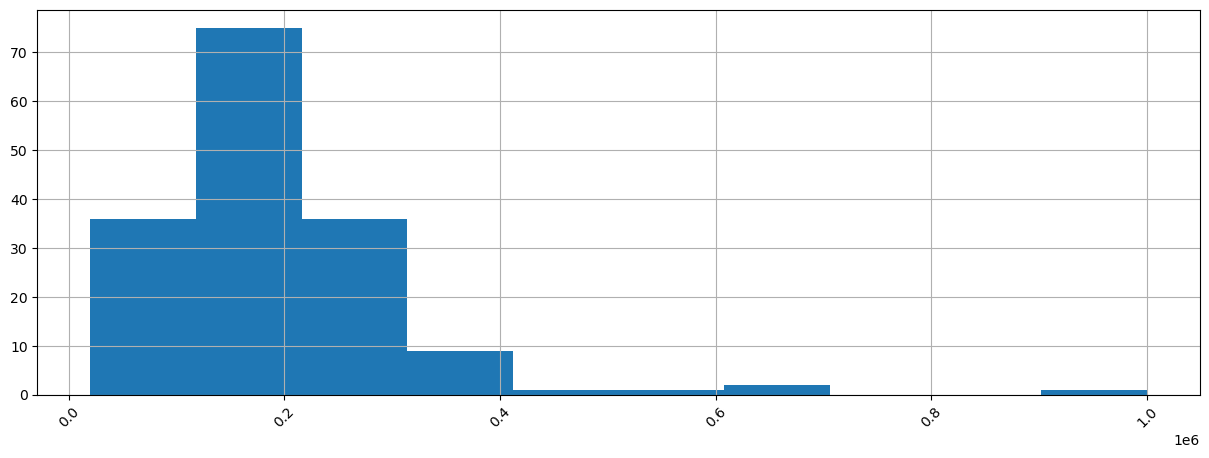

In [43]:
numerical.hist(figsize=(15, 5), bins = 10)
plt.xticks(rotation = 45)
plt.show()

C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_43960\1832229539.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_43960\1832229539.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_43960\1832229539.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_43960\1832229539.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_43960\1832229539.py:20: UserWarning: FixedFormatter should only be

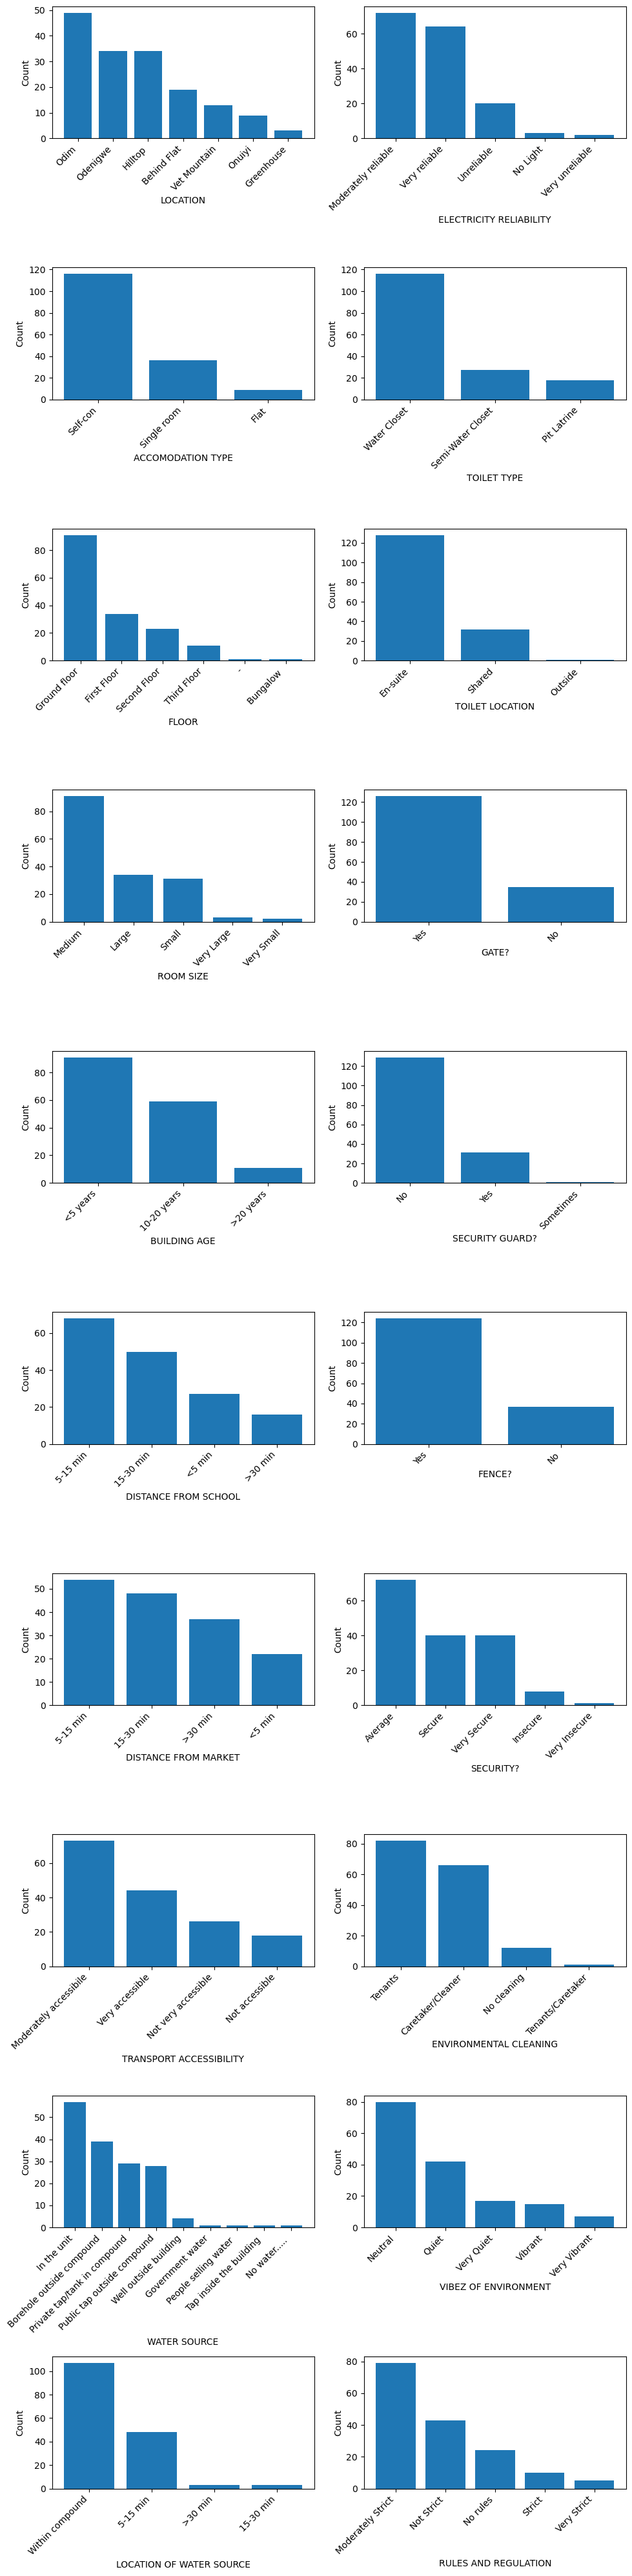

In [222]:
#Creating a way to access the subplots
row = 0
column = 0
#Create the subplots
fig, axs = plt.subplots(10, 2, figsize = (10, 40))


#loop throught the columns of the dataset
for columnname in categorical.columns:
    #for each column do a value counts
    vc = categorical[columnname].value_counts()
    
    #Get the counts and the the values in a seperate list
    x = vc.index.tolist()
    y = vc.values.tolist()
    #Plot a bar chart
    axs[row, column].bar(x, y)
    axs[row, column].set_xlabel(columnname)
    axs[row, column].set_ylabel('Count')
    axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
    
    #Updating the way to access the subplots
    if row >= 9:
        row = 0
        column = 1
    else:
        row +=1


plt.tight_layout()
plt.show()

CONCLUSION:
1. There is an imbalance in this dataset. Some stratas like behind flat, onuiyi, vet mountain and greenhouse has low amount of samples
2. The electricity in most lodges are moderately reliable
3. Most lodges are self-con units
4. Most of the lodges use water closet toilets and most of these toilets are en-suite, which is not strange because self-con lodges are expected to have en-suite toilet
5. Most of the rooms were medium sized.
6. Most lodges have gates and fence
7. Most of the lodges were new
8. Most of the lodges don't have a security guard
9. The distance from most lodges to school is just 5-15 min walk
10. The distance from the lodges to shopping areas are not that much
11. Most respondents thinks that their lodges are averagely secure.
12. Most lodges have moderate accesssibility to transportation 
13. Most of the environmental cleaning is done by Tenants.
14. For most lodges, water is pumped into the unit. 
15. Most people are of the opinion, that the vibez of their environment is neutral.
16. Most lodges have a set of moderately strict rules and regulation.
17. Most lodges have a yearly rent of about 200000

CHECKING THE RELATIONSHIP BETWEEN ALL THE VARIABLES IN THE DATASET


I want to check the relationship of each pair of variables with each other, but since all the other variables are categorical except yearly rent. I'll bin yearly rent to make it categorical and then analyze the relationships using heatmaps

In [44]:
categorical['YEARLY RENT'] = numerical
categorical['YEARLY RENT'] = pd.cut(categorical['YEARLY RENT'], bins = 10, labels = ['20k-100k','100k - 200k', '200k - 300k', '300k - 400k', '400k - 500k', '500k - 600k', '600k - 700k', '700k - 800k', '800k - 900k', '900k - 1M'])

In [45]:
categorical = categorical.apply(lambda x: x.astype('category'))

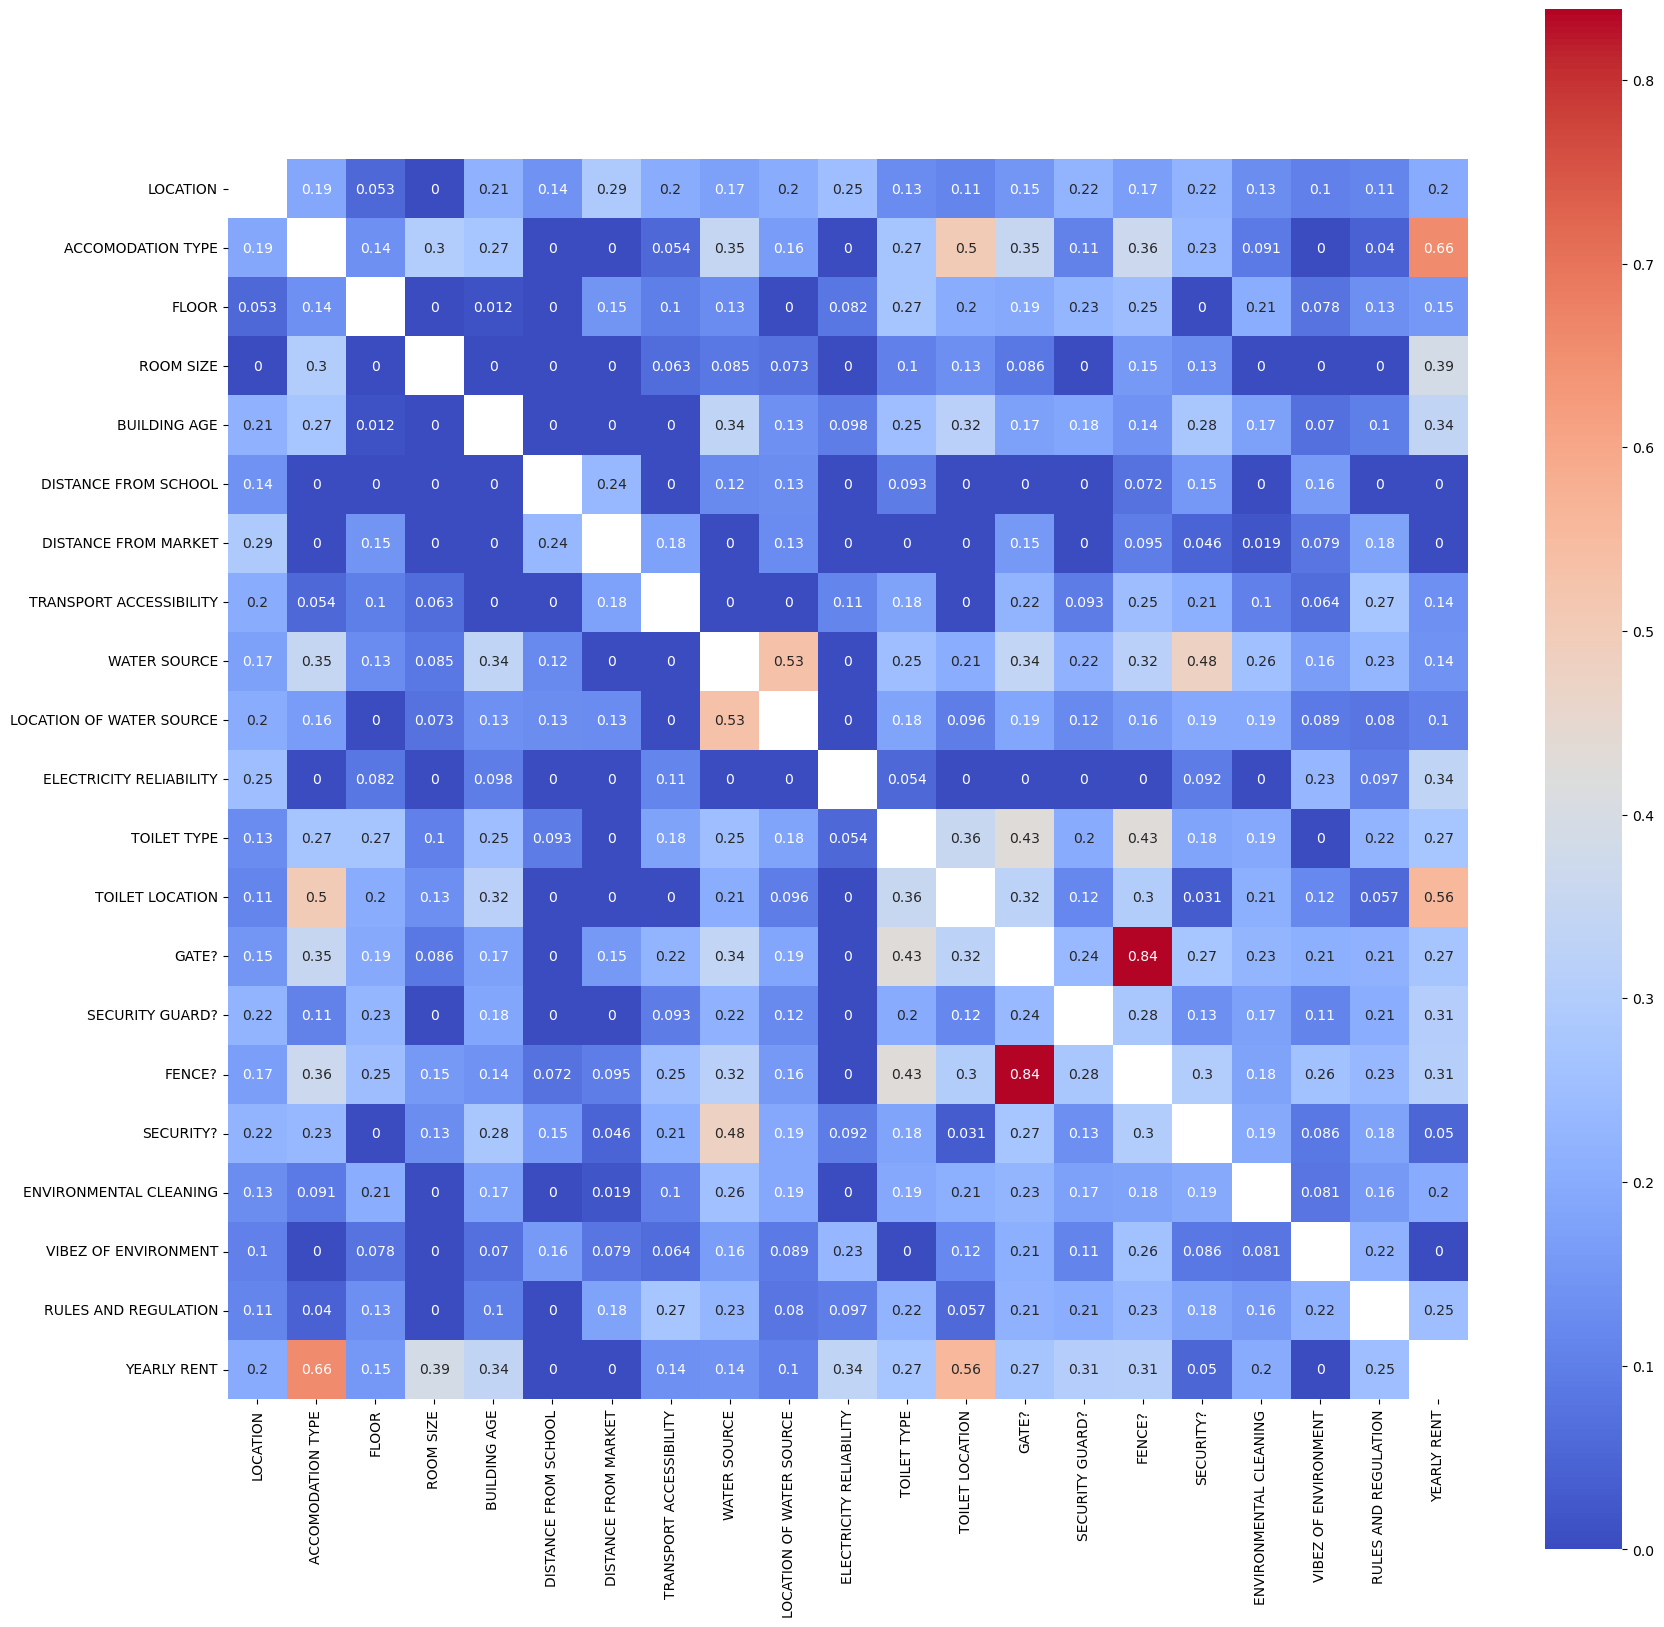

In [46]:
# Please run this column to see the heatmap. I happened to
from scipy.stats import chi2_contingency
corr_matrix = pd.get_dummies(categorical).corr()
cramers_v_matrix = pd.DataFrame(index = categorical.columns, columns = categorical.columns)
for col1 in categorical.columns:
    for col2 in categorical.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(categorical[col1], categorical[col2])
            chi2 = chi2_contingency(contingency_table)[0]
            n = contingency_table.sum().sum()
            r,k = contingency_table.shape
            phi2 = chi2/n
            phi2corr = max(0, phi2-(k-1)*(r-1)/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            cramers_v = np.sqrt(phi2corr/ min((kcorr-1), (rcorr-1)))
            
            cramers_v_matrix.loc[col1, col2] = cramers_v
#display(cramers_v_matrix)
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors ='coerce')
plt.figure(figsize=(20, 20))
sns.heatmap(cramers_v_matrix, annot = True, cmap='coolwarm', square = True)
plt.show()

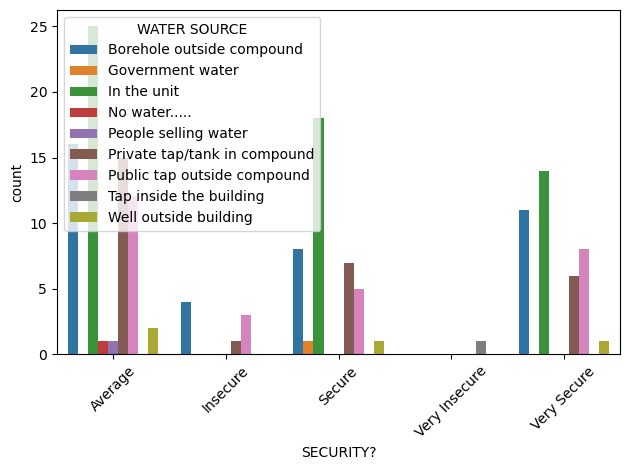

In [226]:
sns.countplot(x = 'SECURITY?', hue = 'WATER SOURCE', data = categorical)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

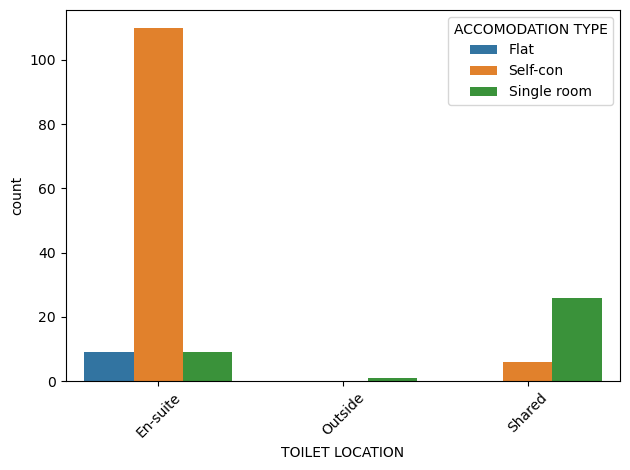

In [227]:
sns.countplot(x = 'TOILET LOCATION', hue = 'ACCOMODATION TYPE', data = categorical)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

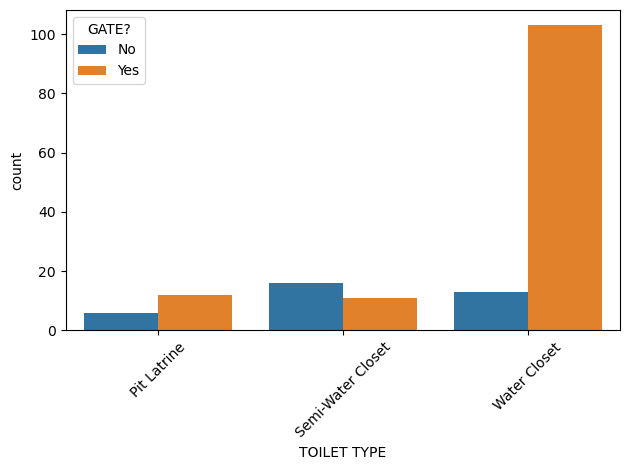

In [228]:
sns.countplot(x = 'TOILET TYPE', hue = 'GATE?', data = categorical)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

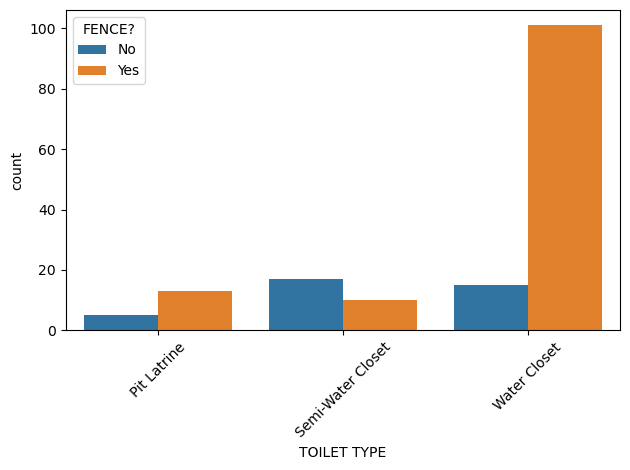

In [229]:
sns.countplot(x = 'TOILET TYPE', hue = 'FENCE?', data = categorical)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

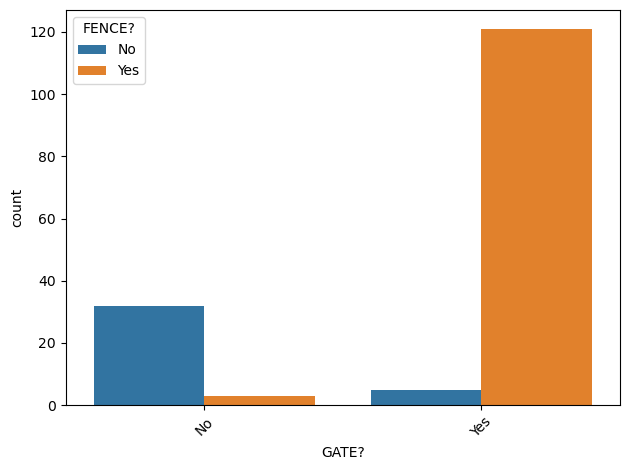

In [230]:
sns.countplot(x = 'GATE?', hue = 'FENCE?', data = categorical)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

CONCLUSION:


From the heatmap, you can see that there is not much correlation between variables in the entire dataset. But there are few exceptions that i'll list below
1. Accomodation type and yearly rent has an above average correlation. We'll look more into this when we compare each of these variables with our target variable
2. Toilet location and room size has a noteable correlation with yearly rent too. We'll look into these further in the next section.
3. Water source has a notable correlation with security which i could not understand why, so i looked into it by plotting the two on a grouped bar chart and I honestly think its just noise in the data.
4. Toilet location and accomodation type seems to have an above average correlation and I checked it out, and as I expected it seems that most selfcons and flats have their toilets ensuite while single rooms have shared toilets. Note that all flats has ensuite toilets.
5. Water source and location of water source seems to have have a good correlation too
6. Fence and Gate has the strongest correlation, and logically if a lodge has a gate, then it should have a fence and vice versa. According to the grouped bar chart, there are some lodges that has gates but no fence, this is logically impossible, so this should be outliers.
7. The last thing is that I thought security would have a significant correlation with fence and gate, but the correlation that i'm seeing is very low.
8. Other things that has a noteable correlation with yearly rent are electricity reliablilty, security guard and fence.
9. Fence and Gate seems to have a good correlation with toilet type, so i checked it out using a count plot and concluded that this correlation shows because houses with water closets seems to have gate. And i think this is either noise in the dataset or a subtle evidence that higher quality things correlate. For example see how houses with good water source correlate with security. But its better to interprete it as noise for now.

ANALYZING RELATIONSHIP OF EACH VARIABLE WITH THE TARGET VARIABLE(YEARLY RENT)

I'll use a grouped bar charts to visualize this

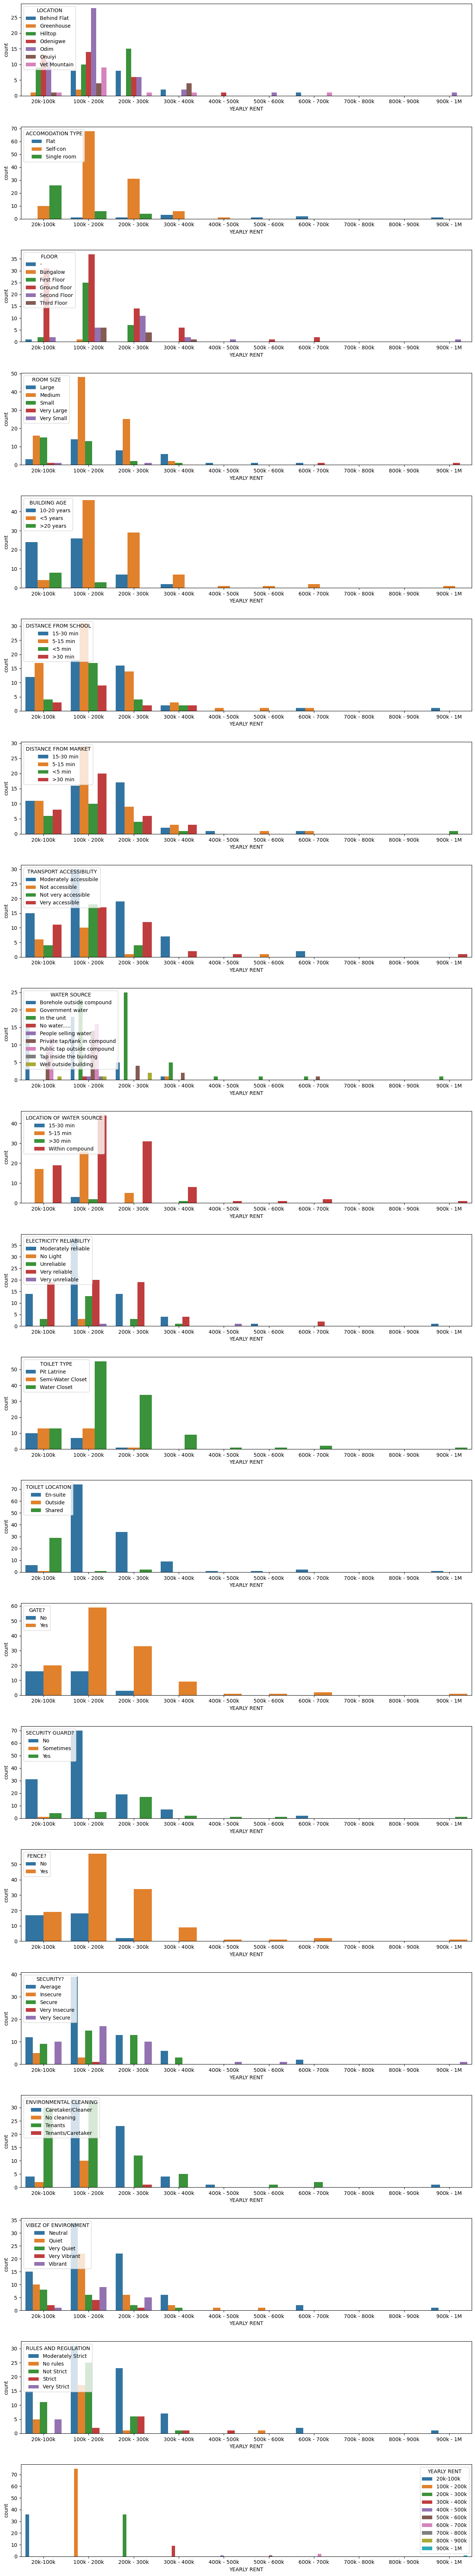

In [231]:
# Create the subplots
fig, axs = plt.subplots(21, 1, figsize = (13, 70))

# Create the counter for the subplopts
row = 0

# Create the loop
for columnname in categorical.columns:
    # Plot the groupplot
    sns.countplot(x = 'YEARLY RENT', hue = columnname, data = categorical, ax = axs[row])
    row += 1
        
#plt.legend(title='YEARLY RENT')
plt.tight_layout()
plt.show()

CONCLUSION:
    
1. Odenigwe seems to have the most of the cheapest lodges, but it also has lodges in all the prices. Odim has the the costliest lodge but it has lodges at other price ranges too. But as seen in the relationship analysis, Location does show much correlation to yearly rent 
2. The second grouped count plot explains the correlation we saw during the relationship analysis. Notice that there is no flat for the 20k-100k category. The higher price categories are for flats. Most lodges in the 20k-100k categories are single rooms. Meaning that most cheaper lodges are single rooms which makes logical sense. Note that the middle ranges are dominated by self-cons.
3. Floor doesn't seem to have much of a correlation with yearly rent.
4. The fourth plot shows us how room size has a notable correlation with yearly rent. Notice that for the 20k to 100k category medium and smaller room sizes has a higher count. This plots also show that this trend continues because as the price increases the count of larger room sizes increases and that of smaller room sizer decreases. But most room sizes are still medium size.
5. Building age does seem to have a noteable correlation with rent. See as most costlier lodges are less than 5 years old but lodges with cheaper rent are older.
6. Distance from school and market and transport accessibility doesn't seem to have much correaltion with rent.
7. 20k-100k lodges doesn't seem to have water running in thier unit. But note that other categories especially the costlier ones have water running in their unit. But also note that apart from this first observation, lodges of all prices seems to have all kinds of water sources, so this column has no correlation with yearly rent.
8. Electricity reliablity and location of water source has no correlation with yearly rent.
9. Most lodges with semi water closet and pit latrine toilets are cheaper,  and costlier lodges has water closets.
10. Notice the correlation of yearly rent and toilet location. For lodges within the range of 20k-100k that is where you see shared toilets or toilets outside. Then you see that for other price ranges higher than the first the toilets are ensuite.
11. Gate and fence has a noteable correlation with rent as you can see from the plot that only the lodges with lower rent are ones with no gates and fences. Costlier ones definately has a gate and a fence.
12. The rest of the other features seems noisy and no noteable insights can be drawn from them.

HANDLING DATA IMBALANCE IN THE ACCOMODATION TYPE COLUMN

In [470]:
data = pd.read_csv('Lodge Rent(Cleaned).csv', encoding = 'utf-8')
x = data.drop('ACCOMODATION TYPE', axis = 1)
y = data['ACCOMODATION TYPE']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 60)


smotecategorical = SMOTENC(categorical_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19], random_state=45)


xbal, ybal = smotecategorical.fit_resample(xtrain, ytrain)

databalanced = pd.concat([xbal, ybal], axis = 1)

PERFORMING ANOTHER ANALYSIS TO ENSURE ACCURACY

DISTRIBUTION ANALYSIS

In [471]:
categorical = databalanced.drop('YEARLY RENT', axis = 1)
numerical = databalanced['YEARLY RENT']

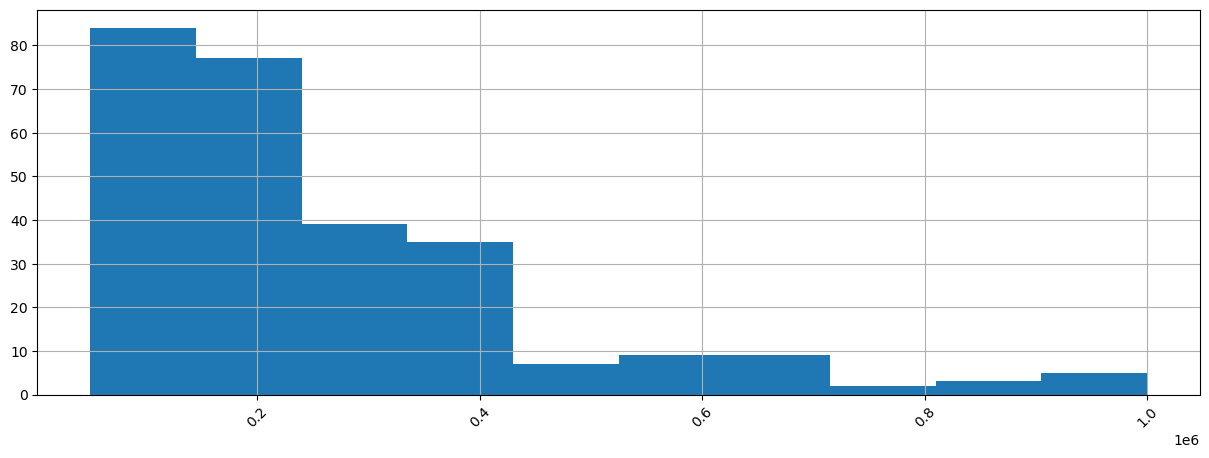

In [472]:
numerical.hist(figsize=(15, 5), bins = 10)
plt.xticks(rotation = 45)
plt.show()

C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_15596\1832229539.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_15596\1832229539.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_15596\1832229539.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_15596\1832229539.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_15596\1832229539.py:20: UserWarning: FixedFormatter should only be

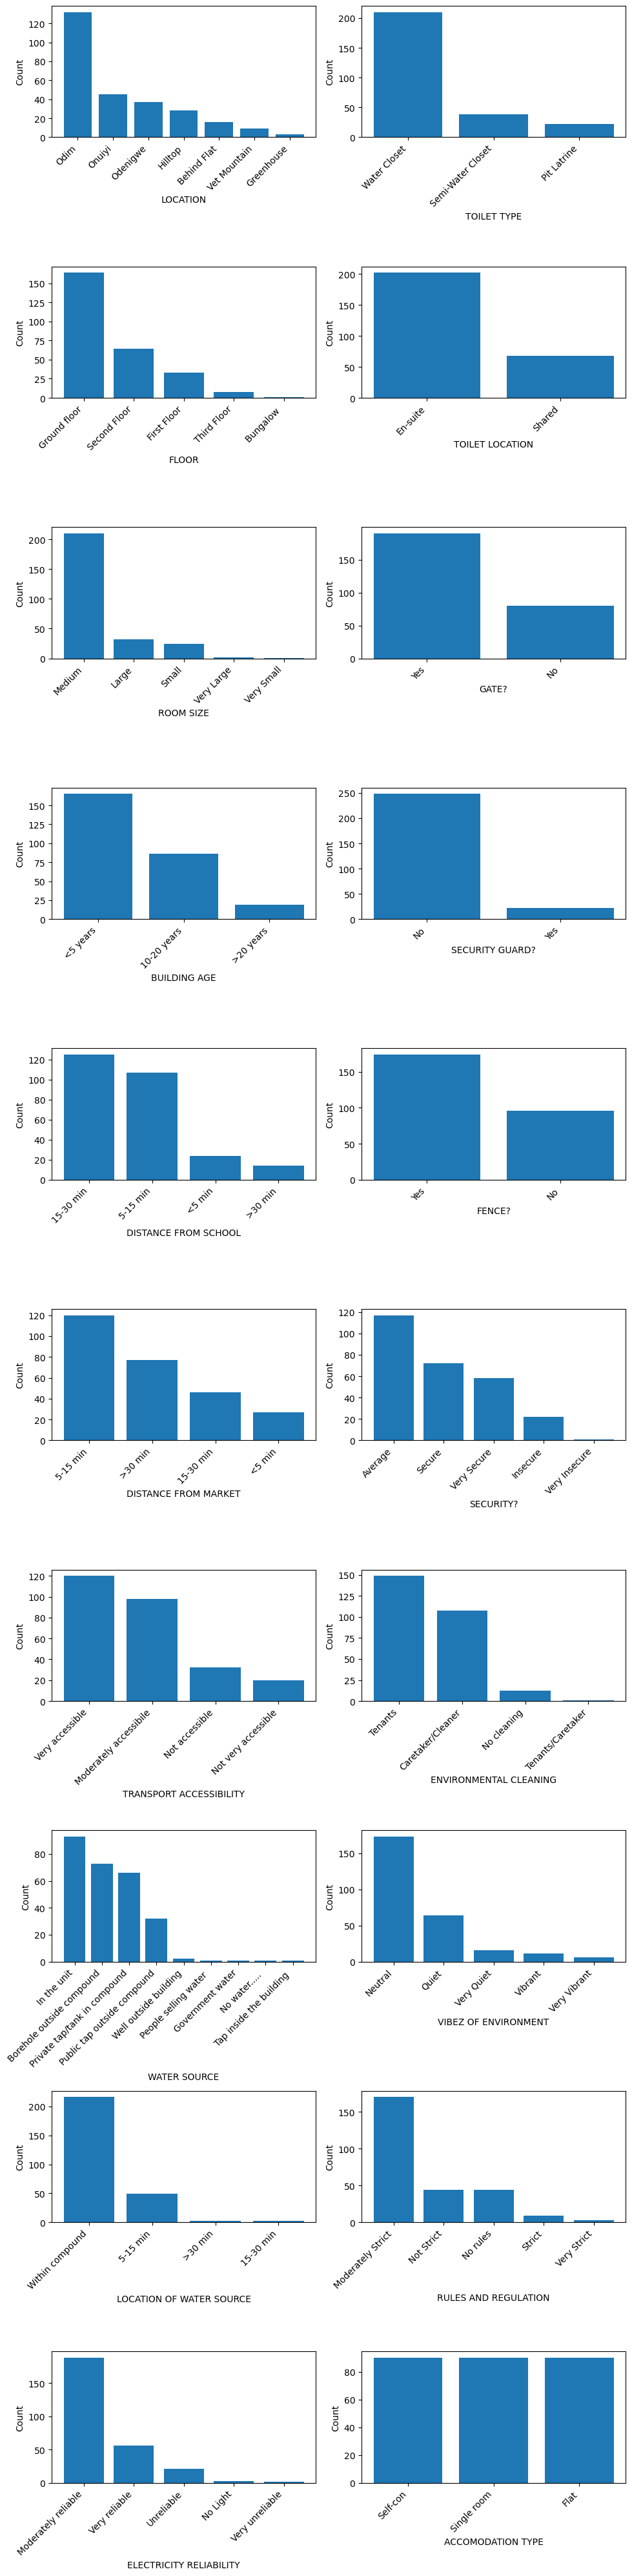

In [473]:
#Creating a way to access the subplots
row = 0
column = 0
#Create the subplots
fig, axs = plt.subplots(10, 2, figsize = (10, 40))


#loop throught the columns of the dataset
for columnname in categorical.columns:
    #for each column do a value counts
    vc = categorical[columnname].value_counts()
    
    #Get the counts and the the values in a seperate list
    x = vc.index.tolist()
    y = vc.values.tolist()
    #Plot a bar chart
    axs[row, column].bar(x, y)
    axs[row, column].set_xlabel(columnname)
    axs[row, column].set_ylabel('Count')
    axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
    
    #Updating the way to access the subplots
    if row >= 9:
        row = 0
        column = 1
    else:
        row +=1


plt.tight_layout()
plt.show()

RELATIONSHIP ANALYSIS

In [474]:
categorical['YEARLY RENT'] = numerical
categorical['YEARLY RENT'] = pd.cut(categorical['YEARLY RENT'], bins = 10, labels = ['20k-100k','100k - 200k', '200k - 300k', '300k - 400k', '400k - 500k', '500k - 600k', '600k - 700k', '700k - 800k', '800k - 900k', '900k - 1M'])

In [475]:
categorical = categorical.apply(lambda x: x.astype('category'))

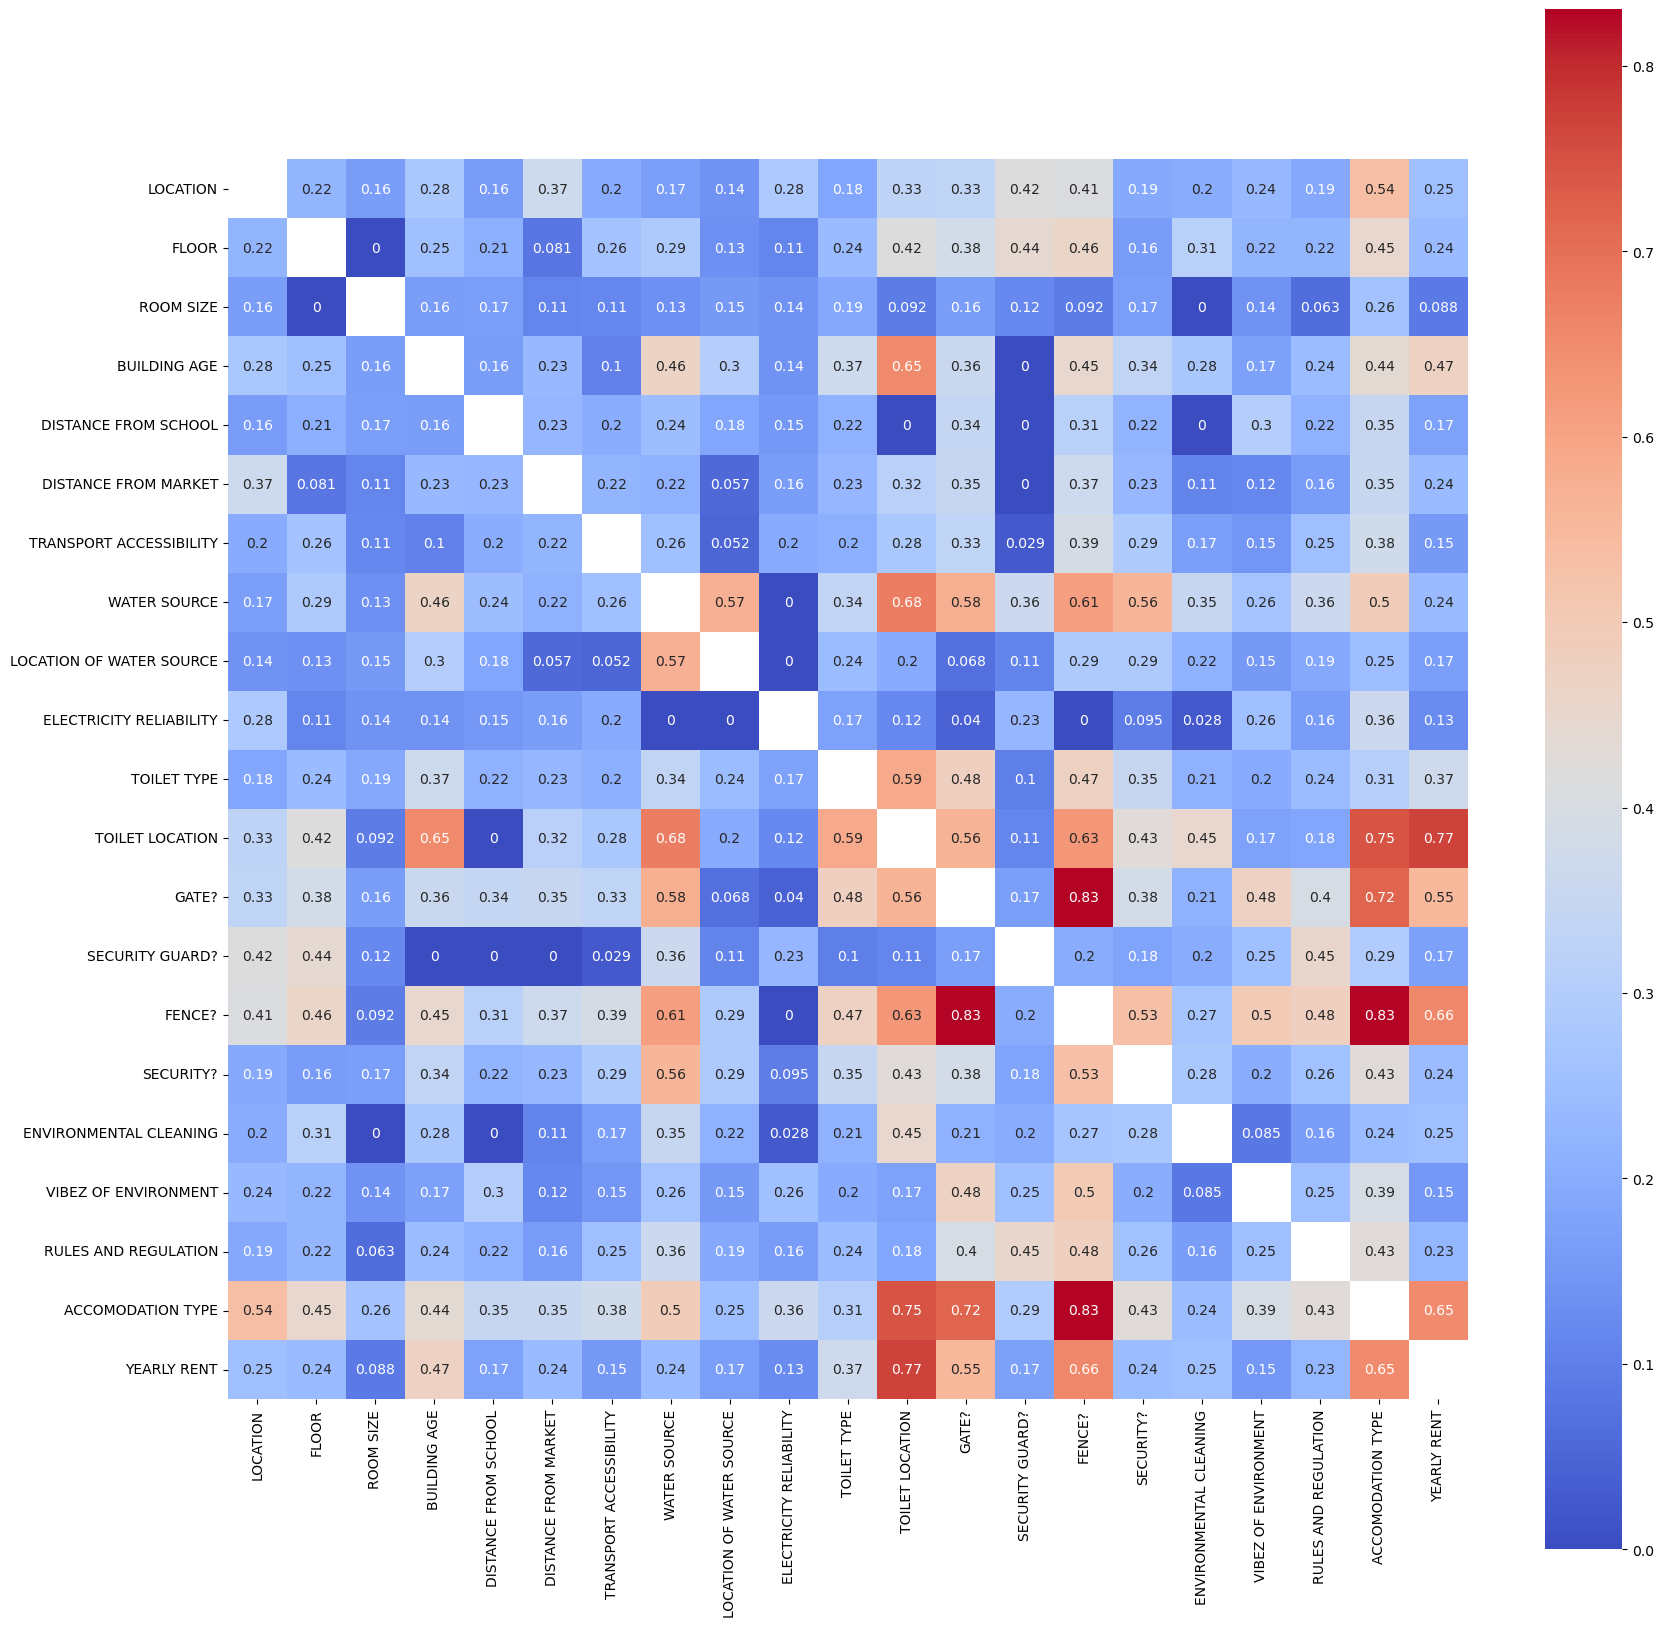

In [476]:
# Please run this column to see the heatmap. I happened to
from scipy.stats import chi2_contingency
cramers_v_matrix = pd.DataFrame(index = categorical.columns, columns = categorical.columns)
for col1 in categorical.columns:
    for col2 in categorical.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(categorical[col1], categorical[col2])
            chi2 = chi2_contingency(contingency_table)[0]
            n = contingency_table.sum().sum()
            r,k = contingency_table.shape
            phi2 = chi2/n
            phi2corr = max(0, phi2-(((k-1)*(r-1))/(n-1)))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            cramers_v = np.sqrt(phi2corr/ min((kcorr-1), (rcorr-1)))
            cramers_v_matrix.loc[col1, col2] = cramers_v
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors ='coerce')
plt.figure(figsize=(20, 20))
sns.heatmap(cramers_v_matrix, annot = True, cmap='coolwarm', square = True)
plt.show()

CONCLUSION:
1. The distribution of most things in the oversampled dataset did not change
2. During the relationship analysis i noticed that the dataset has developed some new unexpected correlations. This is because oversampling has the consequence of adding noise to the data.

So from all the analysis i've done after the oversampling, it seems that the data did develop some errors, but it isn't too bad. Besides, Besides the data i used for the analysis now would be my training data because i don't want any noise in the test data, so that i can be sure of the accuracy.

# MODEL TRAINING AND EVALUATION

I choose 3 models that works great for a mix of categorical and numerical variables for this stage.

I'll use both the all the features and the few features has notable correlation to train the models. For each i'll use gridsearchcv to pick the parameters that would give me the maximum accuracy. 

After everything, i'll choose the model with the least mean absolute error.

DIVIDING INTO TEST AND TRAIN SPLIT AND USING SMOTE TO BALANCE THE TRAINING SET

In [3]:
# I'll convert the data to dummies first
data = pd.read_csv('Lodge Rent(Cleaned).csv', encoding = 'utf-8')
x = data.drop('ACCOMODATION TYPE', axis = 1)
y = data['ACCOMODATION TYPE']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 60)


smotecategorical = SMOTENC(categorical_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19], random_state=45)


xbal, ybal = smotecategorical.fit_resample(xtrain, ytrain)

databalanced = pd.concat([xbal, ybal], axis = 1)
testdata = pd.concat([xtest, ytest], axis = 1)

newdata = pd.concat([databalanced, testdata], axis = 0)

TRAINING DIFFERENT MODELS WITH FEW FEATURES

In [507]:
newx = newdata[['ACCOMODATION TYPE', 'ROOM SIZE', 'BUILDING AGE', 'ELECTRICITY RELIABILITY', 'TOILET LOCATION', 'SECURITY GUARD?', 'FENCE?', 'LOCATION OF WATER SOURCE']]
newy = newdata['YEARLY RENT']

ohe = OneHotEncoder(drop='first', sparse_output = False)
mainohe = ohe.fit(newx)
feature_names = ohe.get_feature_names_out()
newxtrain = pd.DataFrame(mainohe.transform(newx.iloc[:270]), columns=feature_names)
newxtest = pd.DataFrame(mainohe.transform(newx.iloc[270:]), columns = feature_names)
newytrain = newy.iloc[:270]
newytest = newy.iloc[270:]

In [496]:
model_params = {
    'decision_tree':{
        'model': DecisionTreeRegressor(random_state = 70), 
        'params':{
            'criterion':["friedman_mse", "poisson"],
            'max_depth':[None, 3, 5, 10],
            'min_samples_split':[2, 5, 10],
            'min_samples_leaf':[1, 2, 5],
            'max_features': ["sqrt", "log2", None]
        }
    },
    'random_forest':{
        'model': RandomForestRegressor(random_state=70),
        'params': {
            'n_estimators': [2, 5, 10, 50],
            'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
            'max_depth':[None, 3, 5, 10, 50],
            'min_samples_split':[2, 5, 10, 50],
            'min_samples_leaf':[1, 2, 5, 50],
            'max_features': [None, "sqrt", "log2"],
            'bootstrap': [True, False]
        }
    },
    'gradient_boosting_regressor': {
        'model': GradientBoostingRegressor(random_state=70),
        'params': {
            'learning_rate':[0.1, 0.05, 0.01],
            'max_depth':[None, 3, 5, 10],
            'n_estimators':[1, 2, 5, 10],
            'subsample':[0.5, 0.8, 1],
            'min_samples_split':[2, 5, 10],
            'min_samples_leaf':[1, 2, 5],
            'max_features':["sqrt", "log2", None]
        }
    },
}

In [497]:
scores = []

test_fold = [-1]*len(newxtrain)+[0]*len(newxtest)
ps = PredefinedSplit(test_fold)

for modelname, mparam in model_params.items():
    gscv = GridSearchCV(mparam['model'], mparam['params'], cv=ps, scoring = 'neg_mean_absolute_error')
    gscv.fit(np.concatenate((newxtrain, newxtest)), np.concatenate((newytrain, newytest)))
    scores.append({
        'model': modelname,
        'best_score': gscv.best_score_,
        'best_params': gscv.best_params_
    })

In [508]:
gscvdata = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
display(gscvdata)

,model,best_score,best_params
0,decision_tree,-53967.206293,"{'criterion': 'poisson', 'max_depth': 10, 'max..."
1,random_forest,-37669.714146,"{'bootstrap': False, 'criterion': 'absolute_er..."
2,gradient_boosting_regressor,-57662.825323,"{'learning_rate': 0.1, 'max_depth': None, 'max..."


In [509]:
display(gscvdata.iloc[1, 2])

{'bootstrap': False,
 'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [510]:
rfr1 = RandomForestRegressor(bootstrap = False, criterion = 'absolute_error', max_depth = 5, max_features = None, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 50, random_state = 70)
rfr1.fit(newxtrain, newytrain)
ypred = rfr1.predict(newxtest)

mae = mean_absolute_error(newytest, ypred)
print(f'MEAN ABSOLUTE ERROR: {mae}')

r2 = r2_score(newytest, ypred)
print(f'R2: {r2 * 100}')

MEAN ABSOLUTE ERROR: 37669.71414634147
R2: 82.77411971196268


TRAINING DIFFERENT MODELS WITH ALL THE FEATURES

In [433]:
newx = newdata.drop('YEARLY RENT', axis = 1)
newy = newdata['YEARLY RENT']

ohe = OneHotEncoder(drop='first', sparse_output = False)
mainohe = ohe.fit(newx)
feature_names = ohe.get_feature_names_out()
newxtrain = pd.DataFrame(mainohe.transform(newx.iloc[:270]), columns=feature_names)
newxtest = pd.DataFrame(mainohe.transform(newx.iloc[270:]), columns = feature_names)
newytrain = newy.iloc[:270]
newytest = newy.iloc[270:]

In [434]:
scores2 = []

test_fold = [-1]*len(newxtrain)+[0]*len(newxtest)
ps = PredefinedSplit(test_fold)

for modelname, mparam in model_params.items():
    gscv2 = GridSearchCV(mparam['model'], mparam['params'], cv=ps, scoring = 'neg_mean_absolute_error')
    gscv2.fit(np.concatenate((newxtrain, newxtest)), np.concatenate((newytrain, newytest)))
    scores2.append({
        'model': modelname,
        'best_score': gscv2.best_score_,
        'best_params': gscv2.best_params_
    })

In [435]:
gscvdata2 = pd.DataFrame(scores2, columns=['model', 'best_score', 'best_params'])
display(gscvdata2)

,model,best_score,best_params
0,decision_tree,-66592.617143,"{'criterion': 'friedman_mse', 'max_depth': 10,..."
1,random_forest,-43617.353659,"{'bootstrap': False, 'criterion': 'absolute_er..."
2,gradient_boosting_regressor,-65249.031570,"{'learning_rate': 0.1, 'max_depth': 10, 'max_f..."


In [436]:
display(gscvdata2.iloc[1, 2])

{'bootstrap': False,
 'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 2}

In [437]:
rfr2 = RandomForestRegressor(bootstrap = False, criterion = 'absolute_error', max_depth = 10, max_features = 'sqrt' , min_samples_leaf = 1, min_samples_split = 10, n_estimators = 2, random_state = 70)
rfr2.fit(newxtrain, newytrain)
ypred = rfr2.predict(newxtest)

mae = mean_absolute_error(newytest, ypred)
print(f'MEAN ABSOLUTE ERROR: {mae}')

r2 = r2_score(newytest, ypred)
print(f'R2: {r2 * 100}')

MEAN ABSOLUTE ERROR: 43617.35365853659
R2: 68.2611863274823


So after everything it turns out that the random forrest regressor trained with few features, gave the lowest mean absolute error and the highest r2 score, so we will choose it for our lodge price prediction project

In [4]:
newx = newdata[['ACCOMODATION TYPE', 'ROOM SIZE', 'BUILDING AGE', 'ELECTRICITY RELIABILITY', 'TOILET LOCATION', 'SECURITY GUARD?', 'FENCE?', 'LOCATION OF WATER SOURCE']]
newy = newdata['YEARLY RENT']

ohe = OneHotEncoder(drop='first', sparse_output = False)
mainohe = ohe.fit(newx)
feature_names = ohe.get_feature_names_out()
newxtrain = pd.DataFrame(mainohe.transform(newx.iloc[:270]), columns=feature_names)
newxtest = pd.DataFrame(mainohe.transform(newx.iloc[270:]), columns = feature_names)
newytrain = newy.iloc[:270]
newytest = newy.iloc[270:]

rfr1 = RandomForestRegressor(bootstrap = False, criterion = 'absolute_error', max_depth = 5, max_features = None, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 50, random_state = 70)
rfr1.fit(newxtrain, newytrain)
ypred = rfr1.predict(newxtest)

mae = mean_absolute_error(newytest, ypred)
print(f'MEAN ABSOLUTE ERROR: {mae}')

r2 = r2_score(newytest, ypred)
print(f'R2: {r2 * 100}')

MEAN ABSOLUTE ERROR: 37669.71414634147
R2: 82.77411971196268


In [5]:
display(pd.concat([pd.Series(ypred, name = 'Y predicted'), newytest.reset_index(drop = True)], axis = 1))

,Y predicted,YEARLY RENT
0,180000.00,70000
1,200000.00,180000
2,244800.00,220000
3,85000.00,70000
4,67690.50,50000
5,620000.00,700000
6,200000.00,180000
7,188800.00,160000
8,67690.50,100000
9,263000.00,240000


In [74]:
# Saving the best model for reuse

In [7]:
import pickle
with open('Encoder', 'wb') as f:
        pickle.dump(rfr1, f)
with open('best_lodge_prediction_model', 'wb') as f:
        pickle.dump(mainohe, f)